<a href="https://colab.research.google.com/github/shivamjha-9/house-price-prediction/blob/main/House_Price_Prediction_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv("/content/data.csv")
df.dropna(inplace=True)

In [4]:
# print first 5 rows of dataset

print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [5]:
# print last 5 rows of dataset

print(df.tail())

                     date          price  bedrooms  bathrooms  sqft_living  \
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated             street       city  \
4595              0      1954          1979     501

In [6]:
# getting some info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
#statical measures about the data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
# checking the distribution of target variable
print("Distribution of the target variable ('price'):")
print(df['price'].value_counts())

Distribution of the target variable ('price'):
price
0.000000         49
300000.000000    42
400000.000000    31
600000.000000    29
450000.000000    29
                 ..
691000.000000     1
282766.666667     1
406062.500000     1
473200.000000     1
454790.000000     1
Name: count, Length: 1741, dtype: int64


In [9]:
# Drop text columns that can't be used directly
df.drop(columns=['street', 'statezip'], errors='ignore', inplace=True)

In [10]:
# Remove outliers from price
target_col = 'price' if 'price' in df.columns else 'Price'
df = df[df[target_col] < df[target_col].quantile(0.99)]

In [11]:
# One-hot encode safe categorical columns
cat_cols = df.select_dtypes(include='object').nunique()
safe_cats = cat_cols[cat_cols < 50].index.tolist()
df = pd.get_dummies(df, columns=safe_cats, drop_first=True)

In [12]:
# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['date']))
X_test_scaled = scaler.transform(X_test.drop(columns=['date']))

In [15]:
# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [16]:
# Predict
y_pred = model.predict(X_test_scaled)

Mean Squared Error (MSE): 29414818728.4972
R^2 Score: 0.6519


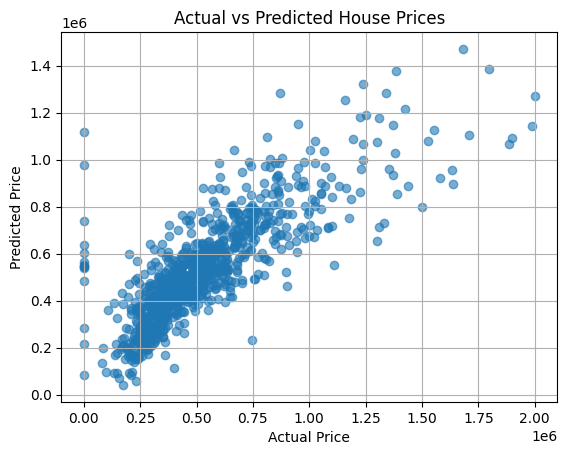

In [17]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [21]:
def get_integer_input(prompt):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Invalid input. Please enter an integer.")

def get_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a number.")

# Function to collect user input and predict
def predict_from_user_input(model, scaler, all_features):
    print("\n🧾 Please enter the following details to predict house price:")

    bedrooms = get_integer_input("Number of bedrooms: ")
    bathrooms = get_float_input("Number of bathrooms: ")
    sqft_living = get_integer_input("Square feet living area: ")
    sqft_lot = get_integer_input("Square feet lot size: ")
    floors = get_integer_input("Number of floors: ")

    while True:
        waterfront = get_integer_input("Waterfront? (1 = Yes, 0 = No): ")
        if waterfront in [0, 1]:
            break
        else:
            print("Invalid input. Please enter 0 for No or 1 for Yes.")

    while True:
        view = get_integer_input("View score (0–4): ")
        if 0 <= view <= 4:
            break
        else:
            print("Invalid input. Please enter an integer between 0 and 4.")

    while True:
        condition = get_integer_input("Condition (1–5): ")
        if 1 <= condition <= 5:
            break
        else:
            print("Invalid input. Please enter an integer between 1 and 5.")

    sqft_above = get_integer_input("Sqft above ground: ")
    sqft_basement = get_integer_input("Sqft basement: ")
    yr_built = get_integer_input("Year built: ")
    yr_renovated = get_integer_input("Year renovated (0 if never): ")
    city = input("City: ")


    input_data = {
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'sqft_living': [sqft_living],
        'sqft_lot': [sqft_lot],
        'floors': [floors],
        'waterfront': [waterfront],
        'view': [view],
        'condition': [condition],
        'sqft_above': [sqft_above],
        'sqft_basement': [sqft_basement],
        'yr_built': [yr_built],
        'yr_renovated': [yr_renovated],
        'city': [city]
    }

    input_df = pd.DataFrame(input_data)

    # One-hot encode the city column
    input_df = pd.get_dummies(input_df, columns=['city'])

    # Ensure all training features are present, adding missing city columns with 0
    for feature in all_features:
        if feature not in input_df.columns:
            input_df[feature] = 0

    # Reorder columns to match training data order
    input_df = input_df[all_features]

    input_scaled = scaler.transform(input_df)
    predicted_price = model.predict(input_scaled)[0]
    print(f"\n💰 Predicted House Price: ${predicted_price:,.2f}")

# Run the prediction
predict_from_user_input(model, scaler, X.drop(columns=['date']).columns)


🧾 Please enter the following details to predict house price:
Number of bedrooms: 3
Number of bathrooms: 2
Square feet living area: 1350
Square feet lot size: 7800
Number of floors: 2
Waterfront? (1 = Yes, 0 = No): 1
View score (0–4): 0
Condition (1–5): 4
Sqft above ground: 1400
Sqft basement: 0
Year built: 1970
Year renovated (0 if never): 2007
City: Shoreline

💰 Predicted House Price: $385,009.02
